In [7]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [8]:
SR = 44100
HOP_LENGTH = 44100//4

In [9]:
y, sr = librosa.load("./dataset/sample.wav", sr=SR)

# リアルタイム的に読み込み

In [10]:
blocks = []
for i in range(0, len(y) - SR, HOP_LENGTH):
    blocks.append(y[i:i+SR])

In [11]:
specs = []
chromes = []

spec_sim = []
chromes_sim = []

BUF_NUM = 12

for b in blocks:
    y_harmonic, y_percussive = librosa.effects.hpss(b)

    C = np.average(librosa.feature.chroma_cens(y=y_harmonic, sr=sr), axis=1)
    D = np.average(librosa.amplitude_to_db(np.abs(librosa.stft(b)), ref=np.max), axis=1)[:512]

    C /= np.linalg.norm(C, ord=2)
    D /= np.linalg.norm(D, ord=2)

    specs.append(D)
    chromes.append(C)

    if len(specs) > BUF_NUM:
        s1 = np.average(np.dot(specs[-1], np.array(specs[-(BUF_NUM-1):-1]).T))
        spec_sim.append(s1)
    if len(chromes) > BUF_NUM*12:
        s2 = np.average(np.dot(chromes[-1], np.array(chromes[-(BUF_NUM-1):-1]).T))
        chromes_sim.append(s2)


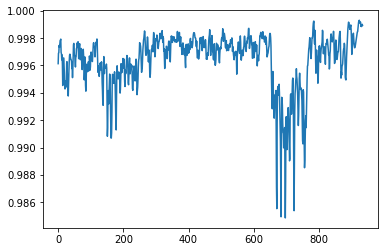

In [12]:
plt.plot(spec_sim)

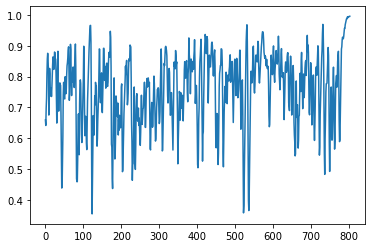

In [13]:
plt.plot(chromes_sim)